# Laboratorio 1


# Objetivos


Aprendera a implementar el modelo  $f_{w,b}$ para la regresión lineal con una sola variable 

## Notacion General



|General Notation | Description| Python (if applicable) |
|-----|:-----|:---:|
| a | scalar, non bold || 
| a | vector, bold || 
| Regression | | | | 
| x | Training Example feature values (Size (1000 $m^{2}$)) | x_train |
| y | Training Example targets (Price (1000s of pesos)) | y_train 
| $x^{(i)}$, $y^{(i)}$ | $i_{th}$ Training Example | x_i, y_i| 
| m | Number of training examples | m| 
| w | parameter: weight | w | 
| b | parameter: bias | b |
| $f_{w,b}(x^{(i)})$ | The result of the model evaluation at $x^{(i)}$ parameterized by $w, b$: $f_{w,b}(x^{(i)}) = wx^{(i)} +b$| f_wb |


 	

## Problema

El ejemplo básico de la predicción del precio de las propiedades según el tamaño de la misma 

Se ejemplifica con 3 puntos.

Una propiedad con 1000 $m^{2}$ vendida en 3 millones y una propiedad con 2000 metros cuadrados vendida en 5 millones. 

Estos dos unicos puntos serán tomados como nuestro conjutno de entrenamiento (training set) 


|index | Size (1000 $m^{2}$)     | Price (10000s de pesos) |
|------| ------------------------| ------------------------ |
|   0  | 1.0                     | 300                      |
|   1  | 2.0                     | 500                      |
|   2  | 3.0                     | 600                      |
|   3  | 4.0                     | 660                      |
|   4  | 5.0                     | 800                      |
|   5  | 6.0                     | 900                      |


Debemos ajustar un modelo de regresión lineal a través de estos dos puntos, para poder predecir el precio para otras propiedades, por ejemplo una propiedad con 1320  $m^{2}$. 


In [30]:
import numpy as np 
import matplotlib.pyplot as plt
from IPython import get_ipython
ipy = get_ipython()
if ipy is not None:
    ipy.run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt


In [43]:
# x_train is the input varibale (size in 1000 m^2)
# y_train in the target (precio en millones de pesos)
x_train = np.array([1.0, 2.0, 3.0])
y_train = np.array([300, 500, 600])
print(f"x_train={x_train}")
print(f"y_train={y_train}")

x_train=[1. 2. 3.]
y_train=[300 500 600]


In [69]:
np.random.seed(0)
x_train = 2 * np.random.rand(20, 1)
y_train = 4 + 3 * x_train + np.random.randn(20, 1)
x_train = x_train.flatten()
y_train = x_train.flatten()

print(f"x_train={x_train}")
print(f"y_train={y_train}")


x_train=[1.09762701 1.43037873 1.20552675 1.08976637 0.8473096  1.29178823
 0.87517442 1.783546   1.92732552 0.76688304 1.58345008 1.05778984
 1.13608912 1.85119328 0.14207212 0.1742586  0.04043679 1.66523969
 1.5563135  1.7400243 ]
y_train=[1.09762701 1.43037873 1.20552675 1.08976637 0.8473096  1.29178823
 0.87517442 1.783546   1.92732552 0.76688304 1.58345008 1.05778984
 1.13608912 1.85119328 0.14207212 0.1742586  0.04043679 1.66523969
 1.5563135  1.7400243 ]


## Numero de ejemplos de entrenamiento (training examples - m) 

Use `m` para denotar el numero de ejemplos de entrenamiento. 

In [55]:
# m is the number of training examples


print(f"x_train.shape:{x_train.shape}")
m = len(x_train)
print(f"Number of training examples is: {m}")


x_train.shape:(20,)
Number of training examples is: 20


## Training example x_i, y_i

Podríamos usar (x$^{(i)}$, y$^{(i)}$) para denotar el $i^{th}$ ejemplo de entrenamiento. Recuerde que Python inicializa en 0, por eso en la tabla anterior se publicó el índice. Quedando (x$^{(0)}$, y$^{(0)}$) es (1.0, 3.0) y (x$^{(1)}$, y$^{(1)}$) es (2.0, 5.0). 

El siguiente código es para obtener el $i^{th}$ ejemplo de entrenamiento.

In [56]:
i=1 #(x^1, y^1)
x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}),y^({i}))=({x_i},{y_i})")

(x^(1),y^(1))=(1.430378732744839,1.430378732744839)


## Plotting the data - Graficando los datos

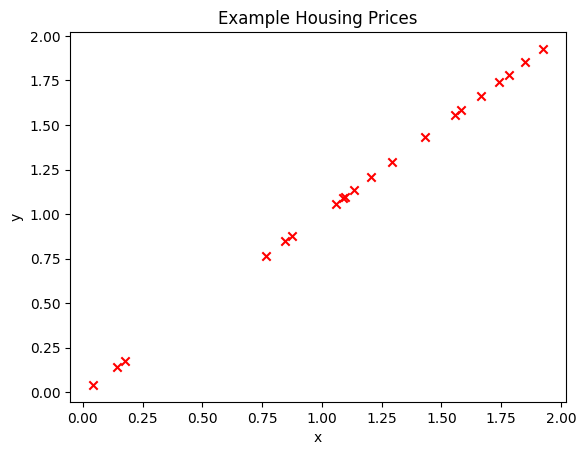

In [57]:
# Plot the data points
plt.scatter(x_train, y_train, marker = 'x', c='r')
# Set the title
plt.title("Example Housing Prices")
# set the y-axis label
plt.ylabel('y')
# set the x-axis label
plt.xlabel('x')
plt.show()

## Función modelo

El modelo de función para la regresion lineal ( la cual es una función que mapea de  `x` a `y`) es representada como 

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$

La formula arriba muestra como puedes representar las lineas rectas - valores diferentes de $w$ y $b$ nos dan diferentes lineas rectas en la grafica.

Si iniciamos con $w = 100$ y $b = 100$. 

**Note: Regrese a la celda (cell) siguiente para ajustar los parametros w,b**

In [58]:
w = 100
b = 100
print(f"w: {w}")
print(f"b: {b}")

w: 100
b: 100


Ahora, calcule el valor para $f_{w,b}(x^{(i)})$ para los dos puntos. Es posible escribir explicitamente para cada punto de la siguiente forma 

for $x^{(0)}$, `f_wb = w * x[0] + b`

for $x^{(1)}$, `f_wb = w * x[1] + b`

En lugar de hacer cada punto, podemos usar el ciclo `for`  para calcularlo con la funcion `compute_model_output`



In [59]:
# The argument description `(ndarray (m,))` describes a Numpy n-dimensional array of shape (m,). `(scalar)` describes an argument without dimensions, just a magnitude.  
# `np.zero(n)` will return a one-dimensional numpy array with $n$ entries  

def compute_model_output(x, w, b):
    """
    Computes the prediction of a linear model
    Args:
      x (ndarray (m,)): Data, m examples 
      w,b (scalar)    : model parameters  
    Returns
      y (ndarray (m,)): target values
    """
   
    
    m = x.shape[0]

    f_wb = np.zeros(m)
    
    for i in range(m):
        f_wb[i] = w * x[i] + b
        
    return f_wb

Ahora, ejecute la funcion `compute_model_output` y grafique la salida

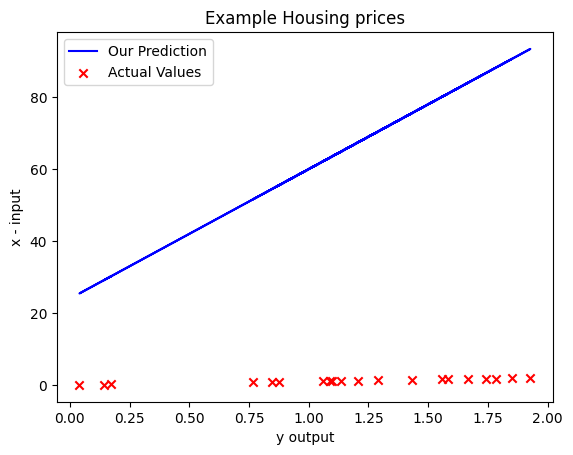

In [66]:
tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Example Housing prices")
# Set the y-axis label
plt.ylabel('x - input')
# Set the x-axis label
plt.xlabel('y output')
plt.legend()
plt.show()

Como puede ver  $w = 100$ y $b = 100$ no son la mejor linea para los datos
### Exprerimente
Ahora, puebe diferentes valores para  $w$ y $b$, y preguntese, Cuales deberian ser los mejores valores para estos datos. 

* Corrija los titulos de los ejes. 
* Experimente con dos datos y con mas de tres datos
* Escriba sus conclusiones sustentándolas con los ejemplos y gráficas respectivas

In [63]:
def graficaExperimente(x_train, y_train, tmp_f_wb , w, b , imagen):
    plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')
    plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')
    plt.title(f"Example {imagen} Housing prices w={w} , b = {b}")
    plt.ylabel('x - price')
    plt.xlabel('y - size')
    plt.legend()
    plt.savefig(f"Prediccion_{imagen}_{w}_{b}.png" )
    plt.show()

def predict_new_value(new_x, w, b):
    return compute_model_output(new_x, w, b)
def mean_squared_error(y, y_):
    m = y.shape[0]
    mse = 0
    for i in range(m):
        mse += (y[i] - y_[i]) ** 2
    return mse / m



#Datos para w y b
|index | W                       | b                        |
|------| ------------------------| ------------------------ |
|   0  | 100                     | 100                      |
|   1  | 150                     | 300                      |
|   2  | 400                     | 200                      |
|   3  | 500                     | 400                      |
|   4  | 505                     | 500                      |


x_train=[2.19525402 2.86075747 2.4110535  2.17953273 1.6946192  2.58357645
 1.75034885 3.567092   3.85465104 1.53376608 3.16690015 2.11557968
 2.27217824 3.70238655 0.28414423 0.3485172  0.08087359 3.33047938
 3.112627   3.48004859]
y_train=[1099.12108693 1430.17357448 1205.83981984 1088.91227025  844.75660886
 1292.44184473  876.03885872 1782.80383654 1929.59527563  765.42867198
 1583.49583468 1057.60265566 1137.6219014  1852.66263536  142.22706382
  174.63676192   39.54900913 1663.25889463 1555.96558975 1740.18064546]


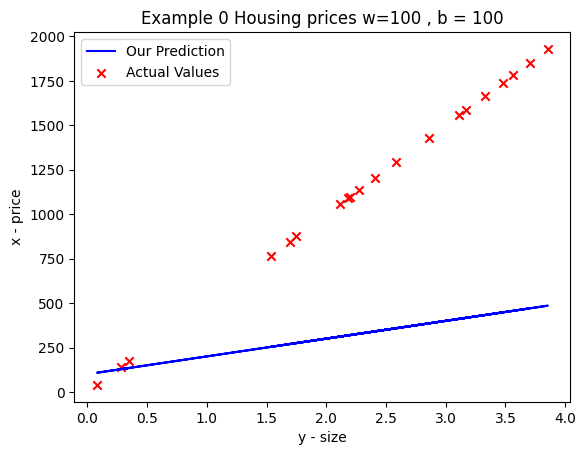

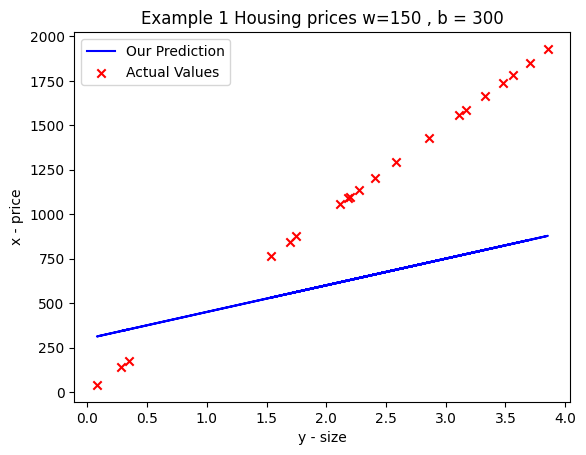

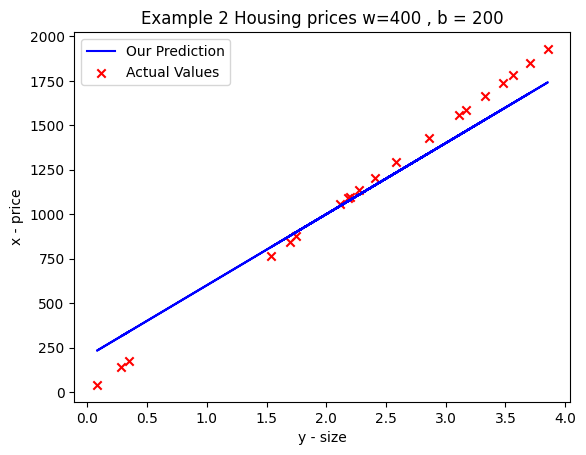

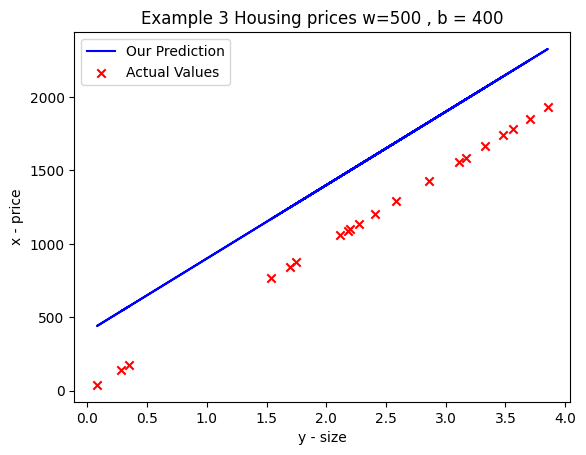

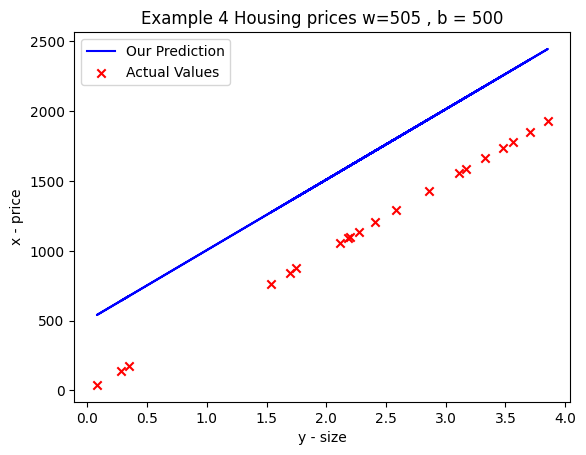

El mejor valor de w: 400
El mejor valor de b: 200
MSE correspondiente: 13303.60300578456
El precio predicho para una propiedad de [1.32] metros cuadrados es: [728.]


In [94]:
n = 20
# x_train = np.random.rand(n) * 10  # Genera n números aleatorios entre 0 y 10
# y_train = np.random.rand(n) * 1000  # Genera n números aleatorios entre 0 y 1000
x_train = np.array([1.0, 2.0, 3.0,4.0, 5.0, 6.0])
y_train = np.array([300, 500, 600,660, 800, 900])
n = 20
np.random.seed(0)
x_train = 4 * np.random.rand(n, 1)
y_train = 500 * x_train + np.random.randn(n, 1)
x_train = x_train.flatten()
y_train = y_train.flatten()
print(f"x_train={x_train}")
print(f"y_train={y_train}")

n = 4
# Valores de prueba para w y b
# valores_b = (np.random.rand(n) * 10).astype(int)
# valores_w = (np.random.rand(n) * 10).astype(int)

valores_w =[100,150,400,500,505] 
valores_b =[100,300,200,400,500] 


mse_valores = []
cont = 0
for w, b in zip(valores_w, valores_b):
    tmp_f_wb = compute_model_output(x_train, w, b)
    mse_valores.append(mean_squared_error(y_train, tmp_f_wb))
    graficaExperimente(x_train, y_train, tmp_f_wb,w, b, cont)
    cont += 1

# Encuentra la combinación con el menor MSE
indice_mejor = np.argmin(mse_valores)
mejor_w = valores_w[indice_mejor]
mejor_b = valores_b[indice_mejor]

print("El mejor valor de w:", mejor_w)
print("El mejor valor de b:", mejor_b)
print("MSE correspondiente:", mse_valores[indice_mejor])


# Predicción para una propiedad de 1320 metros cuadrados
new_x = np.array([1.320])
predicted_price = predict_new_value(new_x, mejor_w, mejor_b)
print(f"El precio predicho para una propiedad de {new_x} metros cuadrados es: {predicted_price}")

El objetivo es encontrar los valores de (w) y (b) que mejor se ajusten a tus datos de entrenamiento. Esto implica minimizar el error entre las predicciones del modelo y los valores reales.

# Predicción
Ahora, que ya tiene su modelo uselo para la prediccion original. Prediga el precio de la propiedad con 1320 metros cuadrados. 




In [18]:
new_x = np.array([1.320])
predicted_price = predict_new_value(new_x, mejor_w, mejor_b)
print(f"El precio predicho para una propiedad de {new_x} metros cuadrados es: {predicted_price}")

El precio predicho para una propiedad de [1.32] metros cuadrados es: [232.]


## Conclusiones 
Durante los experimentos realizados, se ajustaron los parámetros ww y bb en un modelo de regresión lineal, y se observó que variar estos parámetros tuvo un impacto directo en la forma de la línea de regresión. Valores más grandes de ww resultaron en una línea más inclinada, mientras que valores más pequeños la hicieron menos inclinada. Por otro lado, el parámetro bb determinó cuánto se desplazó la línea verticalmente en el eje de las yy. La elección cuidadosa de estos parámetros fue crucial para minimizar el error y lograr un buen ajuste a los datos de entrenamiento.

Además, se observó que el número de datos de entrenamiento afectó la capacidad del modelo para aproximar la línea de regresión. En el experimento 1, con un conjunto de datos más pequeño, la aproximación de la línea fue más difícil, como se observó en la gráfica con solo dos datos. En contraste, en el experimento 2, con un mayor número de datos, la línea de regresión pudo ajustarse mejor a los datos, como se vio en las gráficas con dos y tres puntos respectivamente.

Una vez obtenidos los valores de ww y bb con el menor error, se realizaron predicciones para nuevos valores. El precio predicho para una propiedad de 1.321 metros cuadrados fue 232 en el experimento 1 y 728 en el experimento 2. Es importante destacar que estos valores pueden variar debido a la generación aleatoria de datos.

En conclusión, los experimentos resaltan la importancia de seleccionar cuidadosamente los parámetros del modelo de regresión lineal y la influencia del tamaño del conjunto de datos en la precisión de las predicciones. Además, se demuestra que un mayor número de datos de entrenamiento puede mejorar la capacidad del modelo para ajustarse a los datos observados.